In [4]:
import numpy as np
np.random.seed(2024 - 4 - 16)
import matplotlib.pyplot as plt

In [1]:
# the choice of learning rate alpha will have a big impact on the efficiency and accuracy of a training process
# and poorly chosen alpha may lead to a model not working at all!

In [2]:
# for the sake of simplicity, let's consider a cost function taht uses only weight term without a bias part,
# f(w) =>

# $w = w - \alpha \times \frac{\mathrm{d}}{\mathrm{dw}}f(w)$

### __What will happen if the learning rate alpha is too small?__
----------------

In [39]:
# let's simulate a y = x * 1.876425 model (non-linear)
M = 1.876425
x = np.arange(start = -100, stop = 100, step = 0.10)
y =  M * x + np.random.normal(loc = 0.0, scale = 2, size = x.size)  # introducing some random noise

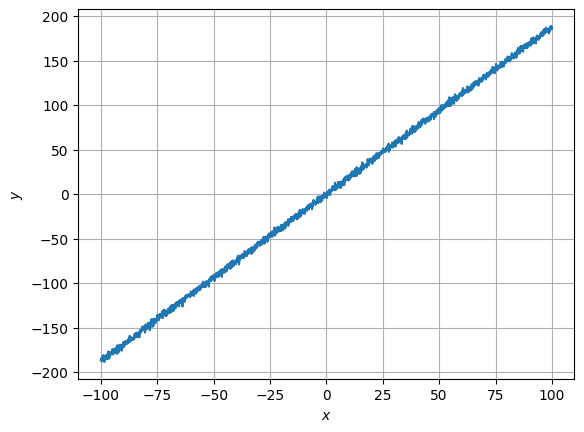

In [40]:
fig, axes = plt.subplots()
axes.plot(x, y)
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

In [12]:
# let's define our cost function

cost_fn = lambda target, m, x : np.square((m * x) - target).sum() / (2 * target.size)

In [42]:
cost_fn(y, M, x)

2.079839345476875

In [43]:
# costs

wcandidates = np.linspace(start = 1, stop = 2.5, num = x.size)
errs = np.array([cost_fn(y, _, x) for _ in wcandidates])
errs.min()

2.0791048849566556

In [44]:
# our alpha here is quite small

wcandidates[1] - wcandidates[0]

0.0007503751875936882

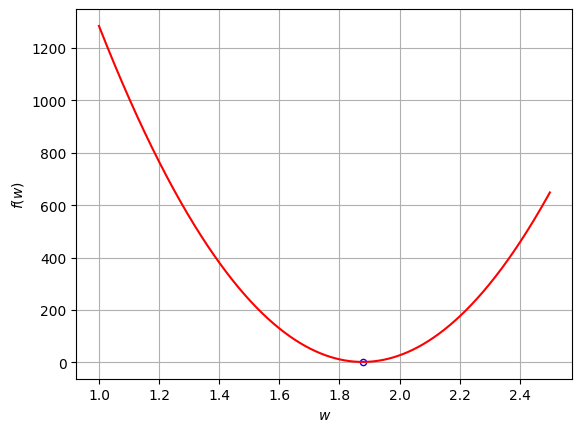

In [45]:
fig, axes = plt.subplots()
axes.plot(wcandidates, errs, color = "red")
axes.scatter(wcandidates[np.argmin(errs)], np.min(errs), c = "white", s = 20, edgecolor = "blue")
axes.set_xlabel("$w$")
axes.set_ylabel("$f(w)$")
axes.grid()
plt.show()

In [46]:
# with such a small learning rate, we'll ultimately end up with a very good estimate for M 
# but the gradient descent process will be incredibly slow
# it'll take a really long time to get to the local minuimum from our bootstrap value for M
# see how many steps we've taken to get here

wcandidates.size

2000

### __What will happen if the learning rate alpha is too big?__

In [47]:
# what happens if the learning rate is too large?
# we'll be taking large strides in the gradient descent and the odds are high to end up with a poor approximation of the local minimum!
# here's a demonstration,

# the M we deduced from previous gradient descent was
wcandidates[np.argmin(errs)]

1.8771885942971487

In [48]:
# and the real M was,
M

1.876425

In [49]:
# a really insignificant difference

np.abs(wcandidates[np.argmin(errs)] - M)

0.0007635942971486731

In [52]:
# with larger strides, i.e 0.20

wcandidates_ = np.arange(start = 1, stop = 2.5, step = 0.25)
errs_ = np.array([cost_fn(y, _, x) for _ in wcandidates_])

In [68]:
np.diff(wcandidates).mean()

0.0007503751875937969

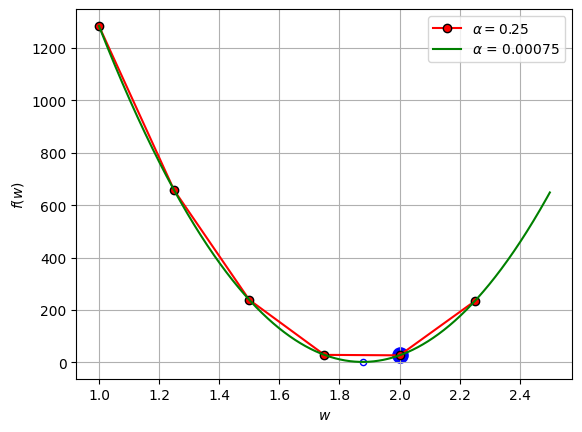

In [69]:
fig, axes = plt.subplots()

axes.plot(wcandidates_, errs_, color = "red", marker = 'o', mec = "black", label = r"$\alpha = 0.25$")
axes.scatter(wcandidates_[np.argmin(errs_)], np.min(errs_), c = "blue", s = 120, edgecolor = "blue")

axes.plot(wcandidates, errs, color = "green", label = r"$\alpha$ = 0.00075")
axes.scatter(wcandidates[np.argmin(errs)], np.min(errs), c = "white", s = 20, edgecolor = "blue")

axes.set_xlabel("$w$")
axes.set_ylabel("$f(w)$")
axes.grid()
axes.legend()
plt.show()

In [72]:
# you can see the conspicuous breaks in the line here, the curve becomes jagged due to the longer jumps
# and see how we have missed the real M value by jumping over it

print(f"With alpha = {np.diff(wcandidates).mean():.5f}, the difference between the estimated w and the real w is {np.abs(wcandidates[np.argmin(errs)] - M):.4f}")
print(f"With alpha = 0.25, the difference between the estimated w and the real w is {np.abs(wcandidates_[np.argmin(errs_)] - M):.4f}")

With alpha = 0.00075, the difference between the estimated w and the real w is 0.0008
With alpha = 0.25, the difference between the estimated w and the real w is 0.1236


In [127]:
# with larger strides, we'll likely step over the local minimum without even recognizing it!
# larger learning rates may result in overshoots and can fail to converge or worse can even diverge!

In [128]:
# for more compex gradient descent algorithms, with multiple parameters
# there may be many local minima and maxima
# what will happen if we have reached a local minimum but there's another even lower minimum (global) acheivable in the graph?

![img](.\canvas.png)

In [103]:
# the above plot of cost function has three local minima and the global minimum is the second minimum!
# A SQUARED ERROR COST FUNCTION WILL ALWAYS GIVE ONE MINIMUM! THIS IS NOT THE RESULT OF USING A SQUARED ERROR COST FUNCTION!

# imagine that we have reached the first local minimum in gradient descent, the derivative of the cost function at this point is 
# the slope of the tangent line, which is a horizontal line because dt this exact point, dj(w) is 0!
# so in our parameter update,

## $w = w - \alpha \times \frac{\mathrm{d}}{\mathrm{dw}}j(w)$
## $\mathrm{d}j(w) = 0$
## $w = w - \alpha \times 0$
## $w = w$

In [1]:
# so, alpha * derivative becomes 0.
# what happens here is that w gets reassigned to w again!
# W WILL NOT BE CHANGED WHATSOEVER!

In [2]:
# SO THE TAKEAWAY HERE IS THAT ONCE GRADIENT DESCENT HAS REACHED A LOCAL MINIMUM, IT WILL NOT JUMP OUT OF THAT TROUGH!
# EVEN IF THE REACHED LOCAL MINIMUM IS NOT THE GLOBAL MINIMUM!!

In [3]:
# EVEN WITH FIXED LEARNING RATES, GRADIENT DESCENT CAN REACH THE LOCAL MINIMUM!

In [37]:
x = np.arange(start = 30, stop = 100, step = 0.1)
m = 2.5641650
y = m * x + np.random.normal(loc = 0.0, scale = 2.5, size = x.size)
mcandidates = np.arange(start = 2, stop = 3, step = 0.0001)

In [40]:
errs = np.array([cost_fn(y, _, x) for _ in mcandidates])
errs.min()

3.0000292631641776

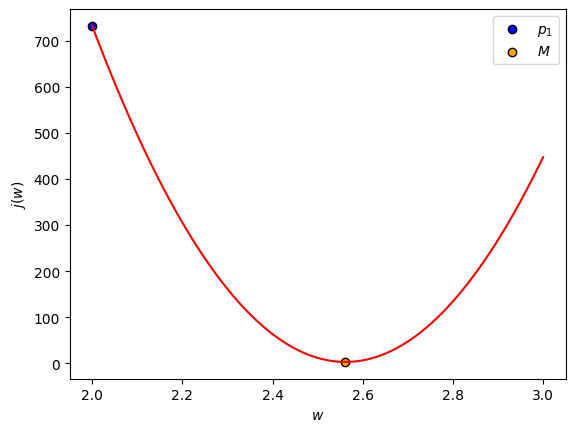

In [55]:
# as gradient descent moves closer to the true minimum, the derivative term will become smaller
# reason is the slope of the tangent line decreses!

fig, axes = plt.subplots()
axes.plot(mcandidates, errs, color = "red")
axes.scatter(mcandidates[0], errs[0], color = "blue", edgecolor = "black", label = "$p_{1}$")
axes.scatter(mcandidates[np.argmin(errs)], errs.min(), color = "orange", edgecolor = "black", label = "$M$")
axes.set_xlabel("$w$")
axes.set_ylabel("$j(w)$")
axes.legend()
# axes.grid()
plt.show()

In [ ]:
# as we move from p1 to M, the slope of the tangent line dj(W)/dw decreases.
# hence the term subtracted from w decreases! (granted that the learning rate alpha is maintained constant)
# as a consequence, the rate of decrease drops slowly - the strides towards the minimum becomes smaller and smaller!